In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("data/chingin/wage_structure_manuf_with_ratios.csv", encoding='utf_8_sig', low_memory=False)
df.head()

,year,company_size,gender,education_level,age_group,service_length,monthly_wage,annual_bonus,num_of_employees,total_annual_income,monthly_wage_total,annual_bonus_total,total_annual_income_total,num_of_employees_total,monthly_wage_ratio,annual_bonus_ratio,total_annual_income_ratio,num_of_employees_ratio
0,2001,L,Total,Total,20-24,0,200300.0,55500.0,21850.0,2459100.0,197700.0,41600.0,2414000.0,119460.0,101.315,133.413,101.868,18.291
1,2001,L,Male,Total,20-24,0,206800.0,61700.0,14660.0,2543300.0,206300.0,41500.0,2517100.0,61680.0,100.242,148.675,101.041,23.768
2,2001,L,Male,JuniorHigh,20-24,0,225700.0,24200.0,360.0,2732600.0,170000.0,10300.0,2050300.0,1430.0,132.765,234.951,133.278,25.175
3,2001,L,Male,HighSchool,20-24,0,189100.0,65300.0,3490.0,2334500.0,186900.0,43400.0,2286200.0,9210.0,101.177,150.461,102.113,37.894
4,2001,L,Male,College,20-24,0,180700.0,26600.0,1520.0,2195000.0,184500.0,29300.0,2243300.0,7710.0,97.940,90.785,97.847,19.715


In [90]:
df = df[(df["age_group"] == "25-29") & 
        (df["company_size"] == "T") &
        (df["gender"] == "Total") &
        (df["education_level"] == "Total") &
        (df["service_length"] == "T")]

In [91]:
df[df["year"] == 2024].head()

,year,company_size,gender,education_level,age_group,service_length,monthly_wage,annual_bonus,num_of_employees,total_annual_income,monthly_wage_total,annual_bonus_total,total_annual_income_total,num_of_employees_total,monthly_wage_ratio,annual_bonus_ratio,total_annual_income_ratio,num_of_employees_ratio
81476,2024,T,Total,Total,25-29,T,249800.0,753700.0,601250.0,3751300.0,267200.0,686200.0,3892600.0,3151420.0,93.488,109.837,96.37,19.079


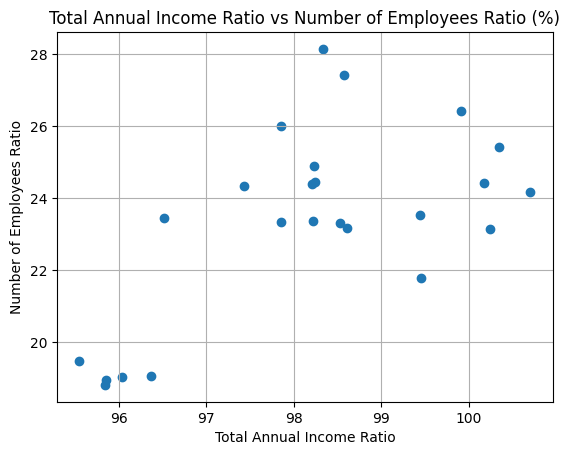

In [23]:
# dfをプロット
plt.scatter(df["total_annual_income_ratio"], df["num_of_employees_ratio"])
plt.xlabel("Total Annual Income Ratio") 
plt.ylabel("Number of Employees Ratio")
plt.title("Total Annual Income Ratio vs Number of Employees Ratio (%)")
plt.grid(True)
plt.show()

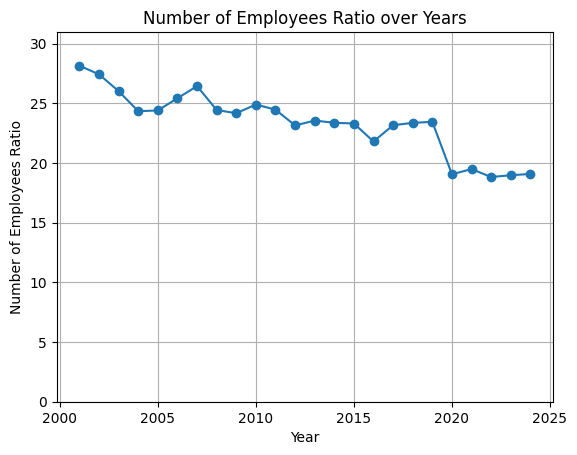

In [26]:
# dfをyearをx軸、num_of_employees_ratioをy軸としてプロット
plt.plot(df["year"], df["num_of_employees_ratio"], marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Employees Ratio")
plt.title("Number of Employees Ratio over Years")
plt.ylim(0, max(df["num_of_employees_ratio"]) * 1.1)
plt.grid(True)
plt.show()

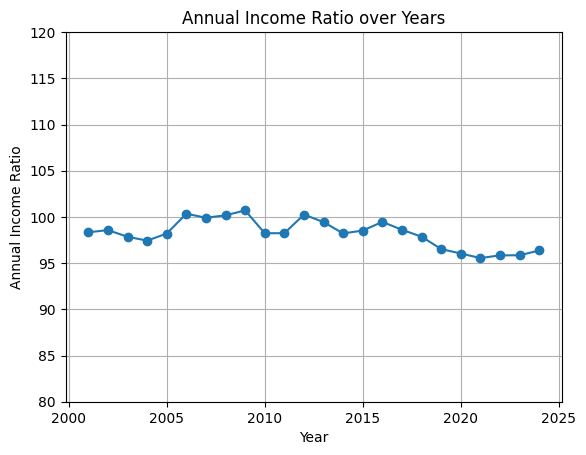

In [34]:
# dfをyearをx軸、total_annual_income_ratioをy軸としてプロット
plt.plot(df["year"], df["total_annual_income_ratio"], marker='o')
plt.xlabel("Year")
plt.ylabel("Annual Income Ratio")
plt.title("Annual Income Ratio over Years")
plt.ylim(80, 120)
plt.grid(True)
plt.show()

### 線形回帰

In [92]:
df_to_predict = df.copy()

In [94]:
df_to_predict["year_normalized"] = df_to_predict["year"] - df_to_predict["year"].min()
df_to_predict.head()

,year,company_size,gender,education_level,age_group,service_length,monthly_wage,annual_bonus,num_of_employees,total_annual_income,monthly_wage_total,annual_bonus_total,total_annual_income_total,num_of_employees_total,monthly_wage_ratio,annual_bonus_ratio,total_annual_income_ratio,num_of_employees_ratio,year_normalized
2510,2001,T,Total,Total,25-29,T,224900.0,758300.0,980650.0,3457100.0,232900.0,720700.0,3515500.0,3484220.0,96.565,105.217,98.339,28.145,0
5731,2002,T,Total,Total,25-29,T,223400.0,732500.0,901780.0,3413300.0,230500.0,696700.0,3462700.0,3288560.0,96.920,105.139,98.573,27.422,1
8946,2003,T,Total,Total,25-29,T,221900.0,665900.0,820950.0,3328700.0,229900.0,642900.0,3401700.0,3156010.0,96.520,103.578,97.854,26.012,2
12174,2004,T,Total,Total,25-29,T,219200.0,637700.0,803450.0,3268100.0,229200.0,603800.0,3354200.0,3301790.0,95.637,105.614,97.433,24.334,3
14468,2005,T,Total,Total,25-29,T,219300.0,642400.0,737500.0,3274000.0,228000.0,597900.0,3333900.0,3022670.0,96.184,107.443,98.203,24.399,4


In [106]:
X = pd.DataFrame({
    'total_annual_income_ratio': np.log(df_to_predict["total_annual_income_ratio"]),
    "year": df_to_predict["year_normalized"]
    }) # 中年層の賃金（対数）
y = np.log(df_to_predict[["num_of_employees_ratio"]])          # 労働者数（対数）

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
print(f"賃金の係数 : {model.coef_[0][0]}")
print(f"年の係数: {model.coef_[0][1]}")

賃金の係数 : 1.4767208379543288
年の係数: -0.012975217853773651


In [142]:
# 2035年までの予測
# total_annual_income_ratioを、前年の1.01倍にしていく
future_years = 5
curr_wage = df["total_annual_income_ratio"].iloc[-1]
last_year = df["year"].iloc[-1]
min_year = df["year"].min()

future_wage_up = [curr_wage * (1.0 ** i) for i in range(1, future_years + 1)]
future_years_list = [last_year + i for i in range(1, future_years + 1)]

# 学習時と同様に、yearから最小年を引いて正規化する
future_years_normalized = [y - min_year for y in future_years_list]

X_future = pd.DataFrame({
    'total_annual_income_ratio': np.log(future_wage_up),
    'year': future_years_normalized
})

y_future_pred = model.predict(X_future)
y_future_pred_exp = np.exp(y_future_pred)

for year, income_ratio, num_employees_ratio in zip(future_years_list, future_wage_up, y_future_pred_exp):
    print(f"Year: {year}, Predicted Total Annual Income Ratio: {income_ratio:.2f}, Predicted Number of Employees Ratio: {num_employees_ratio[0]:.2f}")

Year: 2025, Predicted Total Annual Income Ratio: 96.37, Predicted Number of Employees Ratio: 19.20
Year: 2026, Predicted Total Annual Income Ratio: 96.37, Predicted Number of Employees Ratio: 18.95
Year: 2027, Predicted Total Annual Income Ratio: 96.37, Predicted Number of Employees Ratio: 18.71
Year: 2028, Predicted Total Annual Income Ratio: 96.37, Predicted Number of Employees Ratio: 18.47
Year: 2029, Predicted Total Annual Income Ratio: 96.37, Predicted Number of Employees Ratio: 18.23


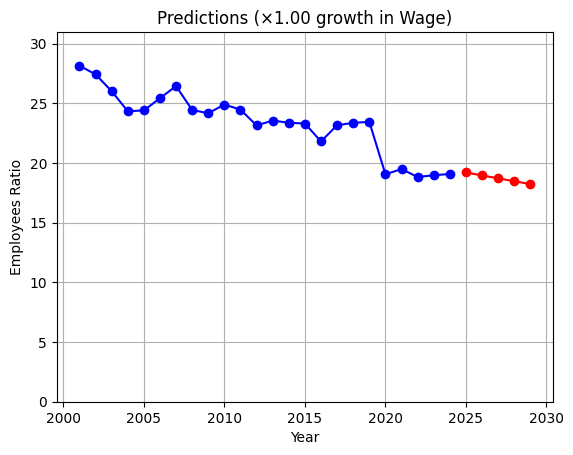

In [143]:
# 予測を結合してプロット
# 2025年以降は赤色にする

all_years = df["year"].tolist() + future_years_list
future_y = y_future_pred_exp
all_num_employees_ratio = df["num_of_employees_ratio"].tolist() + future_y.flatten().tolist()
plt.plot(all_years[:len(df)], all_num_employees_ratio[:len(df)], marker='o', color='blue')
plt.plot(all_years[len(df):], all_num_employees_ratio[len(df):], marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Employees Ratio")
plt.title("Predictions (×1.00 growth in Wage)")
plt.ylim(0, max(all_num_employees_ratio) * 1.1)
plt.grid(True)
plt.show()

### ARIMAXモデル

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
# SARIMAXモデルのために、インデックスを日付型（年次）に設定
# statsmodelsで時系列予測を行うには、適切な日付インデックスと頻度(freq)の設定が必要です
df_sarima = df.copy()
df_sarima.index = pd.to_datetime(df_sarima['year'], format='%Y')
df_sarima.index.freq = 'YS' # 年初(Year Start)として頻度を設定

X = df_sarima[["total_annual_income_ratio"]] # 外生変数: 中年層の賃金
y = df_sarima["num_of_employees_ratio"]      # 内生変数: 労働者数

In [66]:
# モデルの定義と学習
# enforce_stationarity=False, enforce_invertibility=False を設定して、
# パラメータ推定の制約を緩和し、警告を回避します（データ数が少ない場合などに有効です）
model = SARIMAX(endog=y, exog=X, order=(1, 1, 1), trend='c', 
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# 結果の表示
print(results.summary())

                                 SARIMAX Results                                  
Dep. Variable:     num_of_employees_ratio   No. Observations:                   24
Model:                   SARIMAX(1, 1, 1)   Log Likelihood                 -31.707
Date:                    Sun, 30 Nov 2025   AIC                             73.414
Time:                            21:46:34   BIC                             78.637
Sample:                        01-01-2001   HQIC                            74.548
                             - 01-01-2024                                         
Covariance Type:                      opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    -0.2236      0.203     -1.100      0.271      -0.622       0.175
total_annual_income_ratio     0.2173      0.357      0

Forecasted Number of Employees Ratio:
2025-01-01    19.368835
2026-01-01    19.425273
2027-01-01    19.428075
2028-01-01    19.420691
2029-01-01    19.413650
2030-01-01    19.409529
2031-01-01    19.408990
2032-01-01    19.412229
2033-01-01    19.419331
2034-01-01    19.430355
Freq: YS-JAN, Name: predicted_mean, dtype: float64


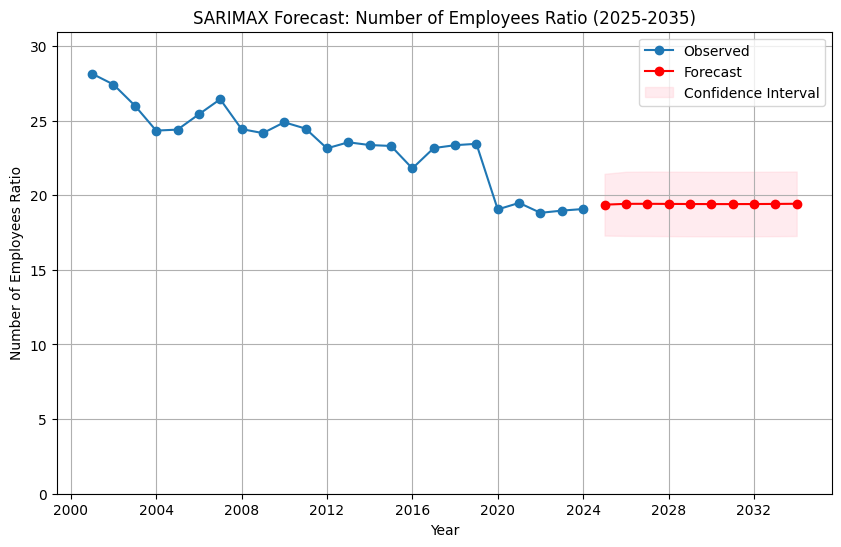

In [81]:
# 2035年までの予測 (SARIMAX)
future_years_sarima = list(range(2025, 2035))
future_dates = pd.to_datetime([f'{year}-01-01' for year in future_years_sarima])

# 外生変数 (X) の将来値を作成 (前年比 1.01倍)
last_income_ratio_sarima = df_sarima["total_annual_income_ratio"].iloc[-1]
future_income_ratios = []
for _ in future_years_sarima:
    last_income_ratio_sarima *= 1.013
    future_income_ratios.append(last_income_ratio_sarima)

future_exog = pd.DataFrame({'total_annual_income_ratio': future_income_ratios}, index=future_dates)
future_exog.index.freq = 'YS'

# 予測の実行
forecast = results.get_forecast(steps=len(future_years_sarima), exog=future_exog)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 結果の表示
print("Forecasted Number of Employees Ratio:")
print(forecast_mean)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(df_sarima.index, df_sarima["num_of_employees_ratio"], label='Observed', marker='o')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', marker='o', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel("Year")
plt.ylabel("Number of Employees Ratio")
plt.ylim(0, max(df_sarima["num_of_employees_ratio"].max(), forecast_mean.max()) * 1.1)
plt.title("SARIMAX Forecast: Number of Employees Ratio (2025-2035)")
plt.legend()
plt.grid(True)
plt.show()